In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns

In [ ]:
Mexico=pd.read_csv('Datos_limpios_Mexico.csv')

In [ ]:
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      26582 non-null  int64  
 1   last_scraped                    26582 non-null  object 
 2   source                          26582 non-null  object 
 3   name                            26582 non-null  object 
 4   description                     26582 non-null  object 
 5   host_name                       26582 non-null  object 
 6   host_since                      26582 non-null  object 
 7   host_location                   26582 non-null  object 
 8   host_about                      26582 non-null  object 
 9   host_response_time              26582 non-null  object 
 10  host_response_rate              26582 non-null  object 
 11  host_acceptance_rate            26582 non-null  object 
 12  host_is_superhost               

In [ ]:
Mexico.head()

,Unnamed: 0,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,0,25/09/2024,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,28/06/2010,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,1.0,1.20
1,1,26/09/2024,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,09/08/2010,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,8.0,0.41
2,2,26/09/2024,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,04/01/2011,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within an hour,...,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.31
3,3,25/09/2024,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,24/08/2010,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,...,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,3.0,0.83
4,4,25/09/2024,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,27/04/2011,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,within an hour,...,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,3.0,0.11


In [ ]:
Mexico=Mexico.drop(columns='Unnamed: 0')
Mexico

,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,25/09/2024,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,28/06/2010,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,0%,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,1.0,1.20
1,26/09/2024,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,09/08/2010,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,100%,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,8.0,0.41
2,26/09/2024,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,04/01/2011,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within an hour,71%,...,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.31
3,25/09/2024,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,24/08/2010,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,100%,...,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,3.0,0.83
4,25/09/2024,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,27/04/2011,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,within an hour,100%,...,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,3.0,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,25/09/2024,city scrape,Charming 2-Bedroom Retreat in Lomas de Bezares,Experience Mexico City in this delightful retr...,HostPal,16/04/2016,"Mexico City, Mexico","I am a social person, who likes to provide the...",within an hour,100%,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,4.9,1.20
26578,25/09/2024,city scrape,Suite King | District Polanco,This spacious room features a plush king-size ...,Luis Angel,13/08/2024,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",within an hour,100%,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,16.0,1.20
26579,25/09/2024,city scrape,Suite King | District Polanco,Discover the essence of luxury in our king-siz...,Luis Angel,13/08/2024,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",within an hour,100%,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,16.0,1.20
26580,25/09/2024,city scrape,Suite Queen | District Polanco,Welcome to your refuge in the heart of Polanco...,Luis Angel,13/08/2024,"Mexico City, Mexico","We offer beautiful, comfortable spaces that wo...",within an hour,100%,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,16.0,1.20


In [ ]:
Mexico.head()

,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,25/09/2024,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",Dici,28/06/2010,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",a few days or more,0%,...,0.0,4.80,4.90,4.80,4.90,4.90,4.90,4.70,1.0,1.20
1,26/09/2024,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,Fernando,09/08/2010,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,within an hour,100%,...,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,8.0,0.41
2,26/09/2024,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",Nicholas,04/01/2011,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within an hour,71%,...,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,2.0,0.31
3,25/09/2024,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Trisha,24/08/2010,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,100%,...,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,3.0,0.83
4,25/09/2024,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,Andrea,27/04/2011,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,within an hour,100%,...,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,3.0,0.11


In [ ]:
freq_tbl(Mexico)

  last_scraped  frequency  percentage  cumulative_perc
0   25/09/2024      15745    0.592318         0.592318
1   26/09/2024      10837    0.407682         1.000000

----------------------------------------------------------------

            source  frequency  percentage  cumulative_perc
0      city scrape      23671     0.89049          0.89049
1  previous scrape       2911     0.10951          1.00000

----------------------------------------------------------------

                                                    name  frequency  \
0         Blueground | Roma Sur 1 recamara, AC & rooftop         57   
1                          Blueground | Polanco, parking         49   
2                       Perfecto Loft en gran ubicaciÃ³n         48   
3      Blueground | Amueblado, Security & Business Ce...         36   
4                               Casa Miravalle | Condesa         21   
...                                                  ...        ...   
25163  Private suite in Con

In [ ]:
table_host_response=freq_tbl(Mexico['host_response_time'])
table_host_response

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,18792,0.706945,0.706945
1,within a day,4725,0.177752,0.884696
2,within a few hours,1957,0.073621,0.958318
3,a few days or more,1108,0.041682,1.000000


In [ ]:
table_host_response2=table_host_response.drop(['percentage','cumulative_perc'],axis=1)
table_host_response2

,host_response_time,frequency
0,within an hour,18792
1,within a day,4725
2,within a few hours,1957
3,a few days or more,1108


In [ ]:
filtro_host_response=table_host_response2.set_index('host_response_time')
filtro_host_response

,frequency
host_response_time,
within an hour,18792
within a day,4725
within a few hours,1957
a few days or more,1108


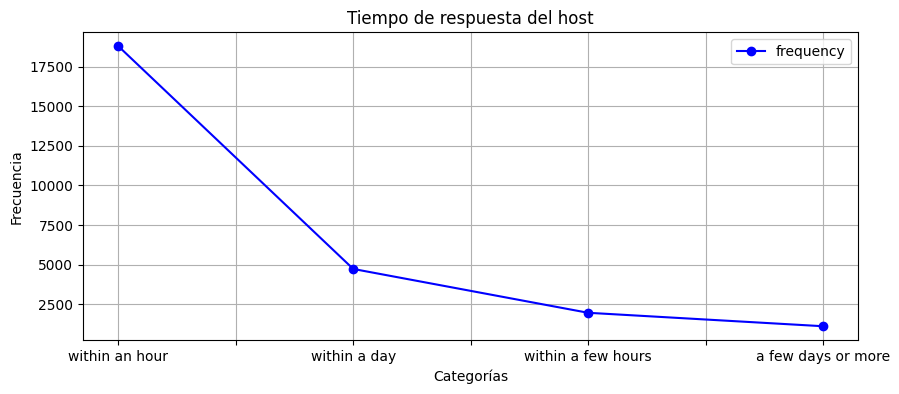

In [ ]:
filtro_host_response.plot(kind='line', marker='o', figsize=(10, 4), color="blue")

plt.title('Tiempo de respuesta del host')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.grid(True)  # Agrega una rejilla para mejor visualización
plt.show()

# source

In [ ]:
table_source=freq_tbl(Mexico['source'])
table_source

,source,frequency,percentage,cumulative_perc
0,city scrape,23671,0.89049,0.89049
1,previous scrape,2911,0.10951,1.00000


In [ ]:
table_source2=table_source.drop(['percentage','cumulative_perc'],axis=1)
table_source2

,source,frequency
0,city scrape,23671
1,previous scrape,2911


In [ ]:
filtro_source=table_source2.set_index('source')
filtro_source

,frequency
source,
city scrape,23671
previous scrape,2911


Text(0, 0.5, 'frecuencia')

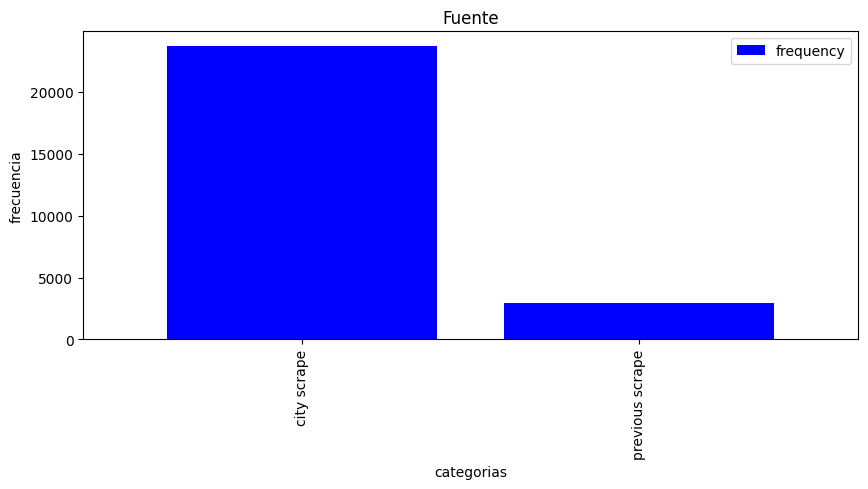

In [ ]:
filtro_source.plot(kind='bar',width=0.8, figsize=(10,4),color="blue")
plt.title('Fuente')
plt.xlabel('categorias')
plt.ylabel('frecuencia')

#host_name


In [ ]:
table_host_name=freq_tbl(Mexico['host_name'])
table_host_name

,host_name,frequency,percentage,cumulative_perc
0,Alejandra,341,0.012828,0.012828
1,Alejandro,293,0.011022,0.023851
2,Luis,292,0.010985,0.034836
3,Virtual,287,0.010797,0.045632
4,Blueground,258,0.009706,0.055338
...,...,...,...,...
4093,Ana Noemy,1,0.000038,0.999850
4094,EliÃ©,1,0.000038,0.999887
4095,Cle,1,0.000038,0.999925
4096,Aby,1,0.000038,0.999962


In [ ]:
table_host_name2=table_host_name.drop(['percentage','cumulative_perc'],axis=1)
table_host_name2

,host_name,frequency
0,Alejandra,341
1,Alejandro,293
2,Luis,292
3,Virtual,287
4,Blueground,258
...,...,...
4093,Ana Noemy,1
4094,EliÃ©,1
4095,Cle,1
4096,Aby,1


In [ ]:
filtro_host_name=table_host_name2[table_host_name2['frequency']>200]
filtro_host_name

,host_name,frequency
0,Alejandra,341
1,Alejandro,293
2,Luis,292
3,Virtual,287
4,Blueground,258
5,Mr. W,243
6,Juan,239
7,Jorge,223
8,Carlos,222


In [ ]:
filtro_host_name2=filtro_host_name.set_index('host_name')
filtro_host_name2

,frequency
host_name,
Alejandra,341
Alejandro,293
Luis,292
Virtual,287
Blueground,258
Mr. W,243
Juan,239
Jorge,223
Carlos,222


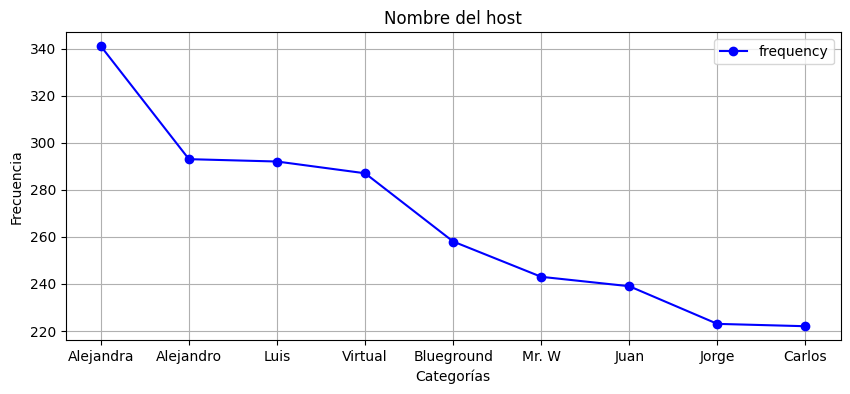

In [ ]:
filtro_host_name2.plot(kind='line', marker='o', figsize=(10, 4), color="blue")

plt.title('Nombre del host')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# host_since

In [ ]:
table_host_since=freq_tbl(Mexico['host_since'])
table_host_since

,host_since,frequency,percentage,cumulative_perc
0,30/01/2023,267,0.010044,0.010044
1,22/12/2013,216,0.008126,0.018170
2,02/02/2020,177,0.006659,0.024829
3,28/09/2023,174,0.006546,0.031375
4,27/04/2016,156,0.005869,0.037243
...,...,...,...,...
4045,24/05/2015,1,0.000038,0.999850
4046,13/01/2019,1,0.000038,0.999887
4047,31/03/2022,1,0.000038,0.999925
4048,05/06/2014,1,0.000038,0.999962


In [ ]:
table_host_since2=table_host_since.drop(['percentage','cumulative_perc'],axis=1)
table_host_since2

,host_since,frequency
0,30/01/2023,267
1,22/12/2013,216
2,02/02/2020,177
3,28/09/2023,174
4,27/04/2016,156
...,...,...
4045,24/05/2015,1
4046,13/01/2019,1
4047,31/03/2022,1
4048,05/06/2014,1


In [ ]:
filtro_host_since=table_host_since2[table_host_since2['frequency']>100]
filtro_host_since

,host_since,frequency
0,30/01/2023,267
1,22/12/2013,216
2,02/02/2020,177
3,28/09/2023,174
4,27/04/2016,156
5,04/08/2018,129
6,26/01/2023,127
7,26/02/2019,116
8,22/08/2016,115
9,07/11/2014,107


In [ ]:
filtro_host_since2=filtro_host_since.set_index('host_since')
filtro_host_since2

,frequency
host_since,
30/01/2023,267
22/12/2013,216
02/02/2020,177
28/09/2023,174
27/04/2016,156
04/08/2018,129
26/01/2023,127
26/02/2019,116
22/08/2016,115


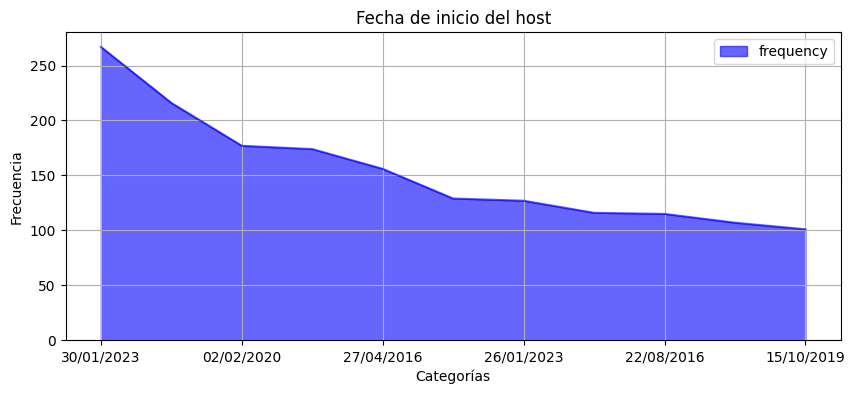

In [ ]:
filtro_host_since2.plot(kind='area', alpha=0.6, figsize=(10, 4), color="blue")

plt.title('Fecha de inicio del host')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#host_location

In [ ]:
table_location=freq_tbl(Mexico['host_location'])
table_location

,host_location,frequency,percentage,cumulative_perc
0,"Mexico City, Mexico",22639,0.851667,0.851667
1,Mexico,949,0.035701,0.887367
2,"Ciudad de MÃ©xico, Mexico",383,0.014408,0.901776
3,"Federal District, Mexico",213,0.008013,0.909789
4,"New York, NY",203,0.007637,0.917425
...,...,...,...,...
395,"Merion Station, PA",1,0.000038,0.999850
396,"Colima, Mexico",1,0.000038,0.999887
397,Singapore,1,0.000038,0.999925
398,"Mahahual, Mexico",1,0.000038,0.999962


In [ ]:
table_location2=table_location.drop(['percentage','cumulative_perc'],axis=1)
table_location2

,host_location,frequency
0,"Mexico City, Mexico",22639
1,Mexico,949
2,"Ciudad de MÃ©xico, Mexico",383
3,"Federal District, Mexico",213
4,"New York, NY",203
...,...,...
395,"Merion Station, PA",1
396,"Colima, Mexico",1
397,Singapore,1
398,"Mahahual, Mexico",1


In [ ]:
filtro_location=table_location2[table_location2['frequency']>100]
filtro_location

,host_location,frequency
0,"Mexico City, Mexico",22639
1,Mexico,949
2,"Ciudad de MÃ©xico, Mexico",383
3,"Federal District, Mexico",213
4,"New York, NY",203
5,"Ciudad de Mexico, Mexico",200
6,"Santiago de QuerÃ©taro, Mexico",172


In [ ]:
filtro_location2=filtro_location.set_index('host_location')
filtro_location2

,frequency
host_location,
"Mexico City, Mexico",22639
Mexico,949
"Ciudad de MÃ©xico, Mexico",383
"Federal District, Mexico",213
"New York, NY",203
"Ciudad de Mexico, Mexico",200
"Santiago de QuerÃ©taro, Mexico",172


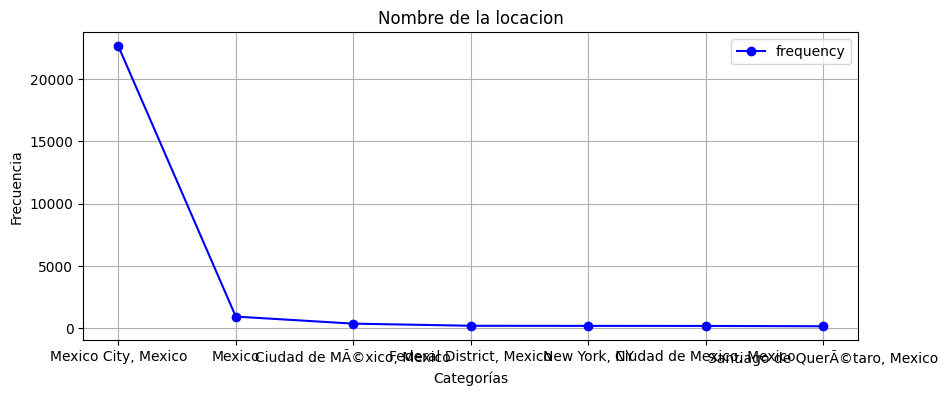

In [ ]:
filtro_location2.plot(kind='line', marker='o', figsize=(10, 4), color="blue")

plt.title('Nombre de la locacion')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#host_about

In [ ]:
table_about=freq_tbl(Mexico['host_about'])
table_about

,host_about,frequency,percentage,cumulative_perc
0,"I am a social person, who likes to provide the...",10965,0.412497,0.412497
1,"Somos Blueground, una empresa internacional de...",258,0.009706,0.422203
2,"Soy una anfitriona profesional, y estoy compro...",177,0.006659,0.428862
3,Wynwood House is a next-gen hospitality brand ...,148,0.005568,0.434429
4,We transform traditional apartments into Kukun...,145,0.005455,0.439884
...,...,...,...,...
6085,Iâm a Mexican woman . I love different kinds...,1,0.000038,0.999850
6086,"Soy una persona sociable, me gusta viajar, con...",1,0.000038,0.999887
6087,I grew up in California and then moved to Buen...,1,0.000038,0.999925
6088,"Tranquilo, Soltero DiseÃ±ador industrial Freel...",1,0.000038,0.999962


In [ ]:
table_about2=table_about.drop(['percentage','cumulative_perc'],axis=1)
table_about2

,host_about,frequency
0,"I am a social person, who likes to provide the...",10965
1,"Somos Blueground, una empresa internacional de...",258
2,"Soy una anfitriona profesional, y estoy compro...",177
3,Wynwood House is a next-gen hospitality brand ...,148
4,We transform traditional apartments into Kukun...,145
...,...,...
6085,Iâm a Mexican woman . I love different kinds...,1
6086,"Soy una persona sociable, me gusta viajar, con...",1
6087,I grew up in California and then moved to Buen...,1
6088,"Tranquilo, Soltero DiseÃ±ador industrial Freel...",1


In [ ]:
filtro_about=table_about2[table_about2['frequency']>100]
filtro_about

,host_about,frequency
0,"I am a social person, who likes to provide the...",10965
1,"Somos Blueground, una empresa internacional de...",258
2,"Soy una anfitriona profesional, y estoy compro...",177
3,Wynwood House is a next-gen hospitality brand ...,148
4,We transform traditional apartments into Kukun...,145
5,"Hello my friends, my house is very big and int...",115
6,Damas y Caballeros sirviendo a Damas y Caballe...,109


In [ ]:
filtro_about2=filtro_about.set_index('host_about')
filtro_about2

,frequency
host_about,
"I am a social person, who likes to provide the best customer service, give them advice and recommendations, so that they have everything they are looking for in a suite so that they feel comfortable and at home.",10965
"Somos Blueground, una empresa internacional de proptech con varios miles de apartamentos listos para mudarse en un nÃºmero creciente de ciudades importantes de todo el mundo. Con condiciones flexibles y alojamientos en barrios vibrantes y cÃ©ntricos, te sentirÃ¡s como en casa y podrÃ¡s recorrer todo el tiempo que quieras: un mes, un aÃ±o o mÃ¡s.",258
"Soy una anfitriona profesional, y estoy comprometida a ofrecer a mis huÃ©spedes una experiencia excepcional durante su estancia. \n\nComo viajera frecuente, sÃ© lo importante que es sentirse bienvenido y cÃ³modo en un lugar nuevo, y por eso me esfuerzo por brindar el mismo nivel de servicio que yo misma espero cuando viajo. \n\nÂ¡Espero tener la oportunidad de alojarlos pronto!",177
"Wynwood House is a next-gen hospitality brand that brings together travelers from across the globe into a network of apartments â with staple quality, design, educational purpose, and sustainability. We have apartments in Mexico, Colombia, Panama, Peru and Spain. Opening soon in Chile, and Miami :)",148
"We transform traditional apartments into Kukuns to create unique lodgings. Where you will enjoy all the comforts of a hotel plus a local experience.\n \nIn each Kukun you will find an incredible design inspired by the most original elements of Mexican culture, premium amenities, and everything you need to enjoy traveling like never before. \n \nWe can't wait to welcome you!",145
"Hello my friends, my house is very big and interesting, I always have guests from different parts of the world and therefore there is a very broad cultural exchange. The location is excellent because the Airport is 15 minutes from here and the downtown too. The Metrobus is around the corner, is very cheap to travel on it.",115
Damas y Caballeros sirviendo a Damas y Caballeros,109


<Axes: ylabel='frequency'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


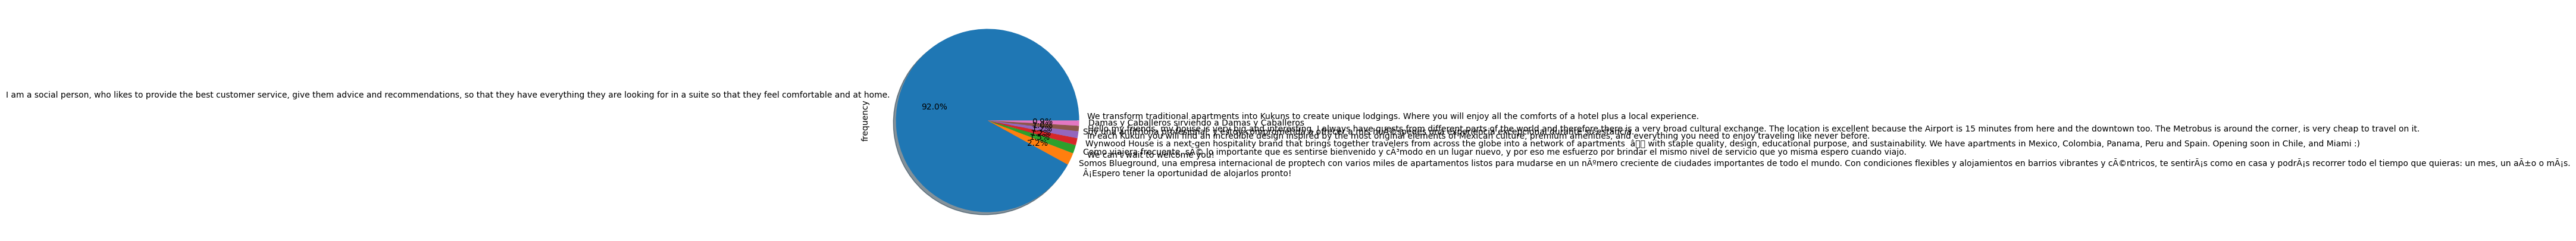

In [ ]:
filtro_about2["frequency"].plot(kind='pie',figsize=(10,5),shadow=True,autopct='%1.1f%%')

#host_response_rate

In [ ]:
table_response_rate=freq_tbl(Mexico['host_response_rate'])
table_response_rate

,host_response_rate,frequency,percentage,cumulative_perc
0,100%,17583,0.661463,0.661463
1,94%,3766,0.141675,0.803137
2,99%,1106,0.041607,0.844745
3,0%,567,0.021330,0.866075
4,90%,559,0.021029,0.887104
...,...,...,...,...
71,18%,2,0.000075,0.999850
72,72%,1,0.000038,0.999887
73,46%,1,0.000038,0.999925
74,54%,1,0.000038,0.999962


In [ ]:
table_response_rate2=table_response_rate.drop(['percentage','cumulative_perc'],axis=1)
table_response_rate2

,host_response_rate,frequency
0,100%,17583
1,94%,3766
2,99%,1106
3,0%,567
4,90%,559
...,...,...
71,18%,2
72,72%,1
73,46%,1
74,54%,1


In [ ]:
filtro_response_rate=table_response_rate2[table_response_rate2['frequency']>500]
filtro_response_rate

,host_response_rate,frequency
0,100%,17583
1,94%,3766
2,99%,1106
3,0%,567
4,90%,559


In [ ]:
filtro_response_rate2=filtro_response_rate.set_index('host_response_rate')
filtro_response_rate2

,frequency
host_response_rate,
100%,17583
94%,3766
99%,1106
0%,567
90%,559


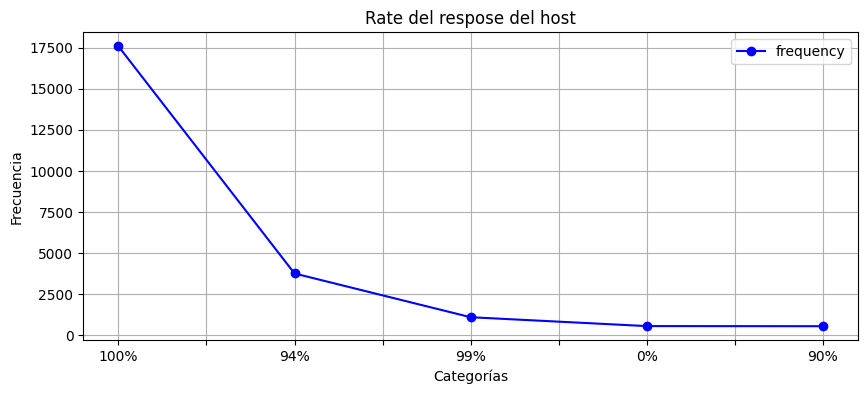

In [ ]:
filtro_response_rate2.plot(kind='line', marker='o', figsize=(10, 4), color="blue")

plt.title('Rate del respose del host')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#host_acceptance_rate


In [ ]:
table_acceptance_rate=freq_tbl(Mexico['host_acceptance_rate'])
table_acceptance_rate

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,100%,10846,0.408020,0.408020
1,99%,3339,0.125611,0.533632
2,89%,3096,0.116470,0.650102
3,98%,1418,0.053344,0.703446
4,97%,1095,0.041193,0.744639
...,...,...,...,...
93,23%,2,0.000075,0.999774
94,27%,2,0.000075,0.999850
95,32%,2,0.000075,0.999925
96,7%,1,0.000038,0.999962


In [ ]:
table_acceptance_rate2=table_acceptance_rate.drop(['percentage','cumulative_perc'],axis=1)
table_acceptance_rate2

,host_acceptance_rate,frequency
0,100%,10846
1,99%,3339
2,89%,3096
3,98%,1418
4,97%,1095
...,...,...
93,23%,2
94,27%,2
95,32%,2
96,7%,1


In [ ]:
filtro_accepteance_rate=table_acceptance_rate2[table_acceptance_rate2['frequency']>900]
filtro_accepteance_rate

,host_acceptance_rate,frequency
0,100%,10846
1,99%,3339
2,89%,3096
3,98%,1418
4,97%,1095
5,0%,904


In [ ]:
filtro_accepteance_rate2=filtro_accepteance_rate.set_index('host_acceptance_rate')
filtro_accepteance_rate2

,frequency
host_acceptance_rate,
100%,10846
99%,3339
89%,3096
98%,1418
97%,1095
0%,904


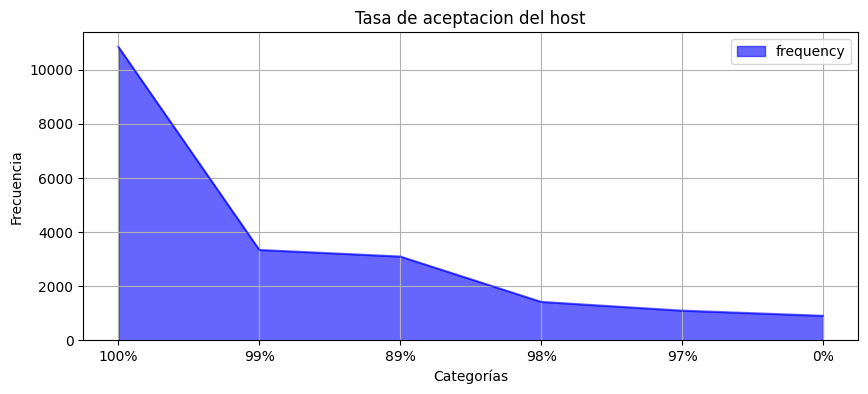

In [ ]:
filtro_accepteance_rate2.plot(kind='area', alpha=0.6, figsize=(10, 4), color="blue")

plt.title('Tasa de aceptacion del host')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#host_is_superhost

In [ ]:
table_superhost=freq_tbl(Mexico['host_is_superhost'])
table_superhost

,host_is_superhost,frequency,percentage,cumulative_perc
0,f,16855,0.634076,0.634076
1,t,9727,0.365924,1.000000


In [ ]:
table_superhost2=table_superhost.drop(['percentage','cumulative_perc'],axis=1)
table_superhost2

,host_is_superhost,frequency
0,f,16855
1,t,9727


In [ ]:
filtro_superhost=table_superhost2.set_index('host_is_superhost')
filtro_superhost

,frequency
host_is_superhost,
f,16855
t,9727


Text(0, 0.5, 'frecuencia')

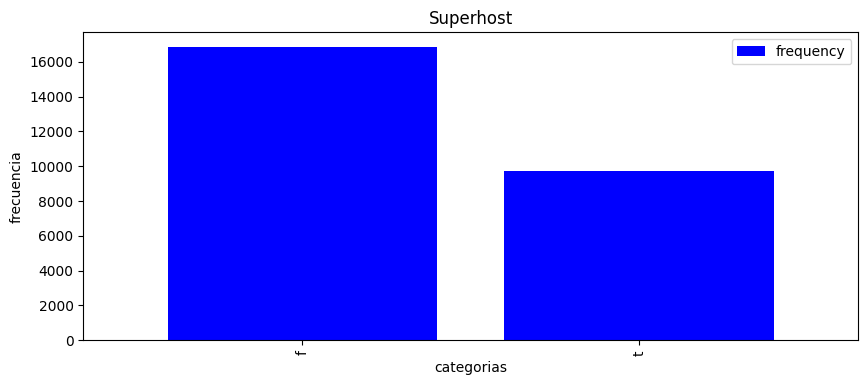

In [ ]:
filtro_superhost.plot(kind='bar',width=0.8, figsize=(10,4),color="blue")
plt.title('Superhost')
plt.xlabel('categorias')
plt.ylabel('frecuencia')

#host_verifications

In [ ]:
table_verifications=freq_tbl(Mexico['host_verifications'])
table_verifications

,host_verifications,frequency,percentage,cumulative_perc
0,"['email', 'phone']",20504,0.771349,0.771349
1,"['email', 'phone', 'work_email']",3381,0.127191,0.898540
2,['phone'],2527,0.095064,0.993605
3,"['phone', 'work_email']",105,0.003950,0.997555
4,['email'],33,0.001241,0.998796
5,[],30,0.001129,0.999925
6,"['email', 'work_email']",1,0.000038,0.999962
7,['work_email'],1,0.000038,1.000000


In [ ]:
table_verifications2=table_verifications.drop(['percentage','cumulative_perc'],axis=1)
table_verifications2

,host_verifications,frequency
0,"['email', 'phone']",20504
1,"['email', 'phone', 'work_email']",3381
2,['phone'],2527
3,"['phone', 'work_email']",105
4,['email'],33
5,[],30
6,"['email', 'work_email']",1
7,['work_email'],1


In [ ]:
filtro_verifications=table_verifications2.set_index('host_verifications')
filtro_verifications

,frequency
host_verifications,
"['email', 'phone']",20504
"['email', 'phone', 'work_email']",3381
['phone'],2527
"['phone', 'work_email']",105
['email'],33
[],30
"['email', 'work_email']",1
['work_email'],1


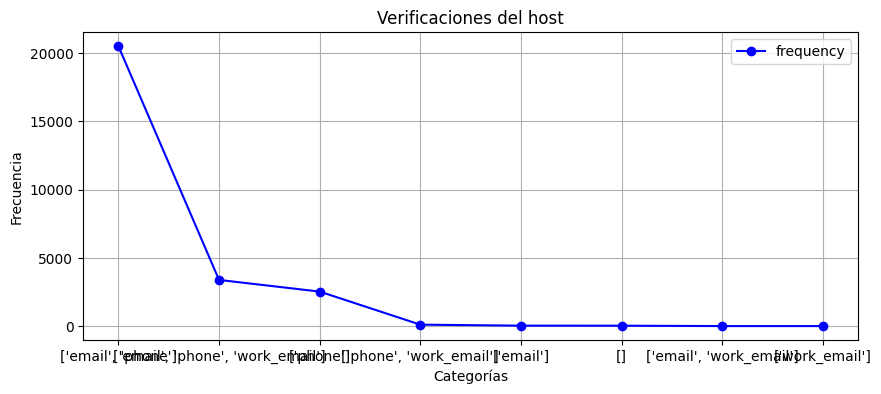

In [ ]:
filtro_verifications.plot(kind='line', marker='o', figsize=(10, 4), color="blue")

plt.title('Verificaciones del host')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#host_has_profile_pic

In [ ]:
table_profile_pic=freq_tbl(Mexico['host_has_profile_pic'])
table_profile_pic

,host_has_profile_pic,frequency,percentage,cumulative_perc
0,t,26100,0.981867,0.981867
1,f,482,0.018133,1.000000


In [ ]:
table_profile_pic2=table_profile_pic.drop(['percentage','cumulative_perc'],axis=1)
table_profile_pic2

,host_has_profile_pic,frequency
0,t,26100
1,f,482


In [ ]:
filtro_profile_pic=table_profile_pic2.set_index('host_has_profile_pic')
filtro_profile_pic

,frequency
host_has_profile_pic,
t,26100
f,482


Text(0, 0.5, 'frecuencia')

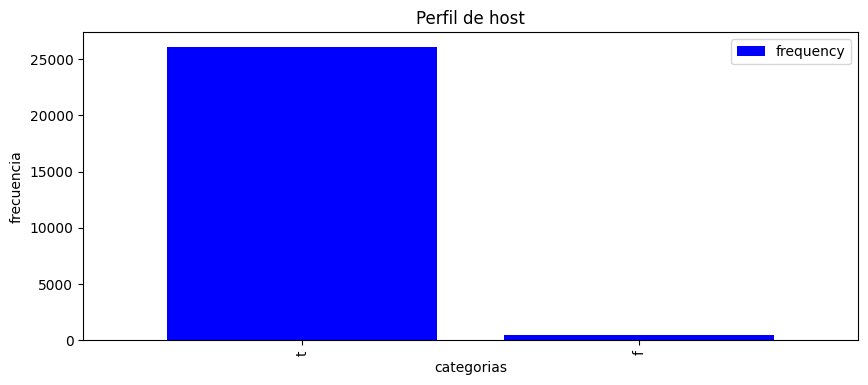

In [ ]:
filtro_profile_pic.plot(kind='bar',width=0.8, figsize=(10,4),color="blue")
plt.title('Perfil de host')
plt.xlabel('categorias')
plt.ylabel('frecuencia')

#host_identity_verified

In [ ]:
table_indetity=freq_tbl(Mexico['host_identity_verified'])
table_indetity

,host_identity_verified,frequency,percentage,cumulative_perc
0,t,25426,0.956512,0.956512
1,f,1156,0.043488,1.000000


In [ ]:
table_indetity2=table_indetity.drop(['percentage','cumulative_perc'],axis=1)
table_indetity2

,host_identity_verified,frequency
0,t,25426
1,f,1156


In [ ]:
filtro_identity=table_indetity2.set_index('host_identity_verified')
filtro_identity

,frequency
host_identity_verified,
t,25426
f,1156


<Axes: ylabel='frequency'>

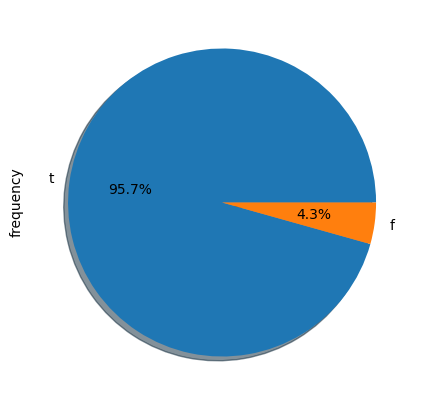

In [ ]:
filtro_identity["frequency"].plot(kind='pie',figsize=(10,5),shadow=True,autopct='%1.1f%%')

#property_type

In [ ]:
table_property=freq_tbl(Mexico['property_type'])
table_property

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,9971,0.375103,0.375103
1,Entire condo,3423,0.128771,0.503875
2,Private room in rental unit,3034,0.114137,0.618012
3,Private room in home,2266,0.085246,0.703258
4,Entire loft,1515,0.056993,0.760251
...,...,...,...,...
87,Private room in floor,1,0.000038,0.999850
88,Earthen home,1,0.000038,0.999887
89,Entire in-law,1,0.000038,0.999925
90,Shared room in dorm,1,0.000038,0.999962


In [ ]:
table_property2=table_property.drop(['percentage','cumulative_perc'],axis=1)
table_property2

,property_type,frequency
0,Entire rental unit,9971
1,Entire condo,3423
2,Private room in rental unit,3034
3,Private room in home,2266
4,Entire loft,1515
...,...,...
87,Private room in floor,1
88,Earthen home,1
89,Entire in-law,1
90,Shared room in dorm,1


In [ ]:
filtro_property=table_property2[table_property2['frequency']>1000]
filtro_property

,property_type,frequency
0,Entire rental unit,9971
1,Entire condo,3423
2,Private room in rental unit,3034
3,Private room in home,2266
4,Entire loft,1515


In [ ]:
filtro_property2=filtro_property.set_index('property_type')
filtro_property2

,frequency
property_type,
Entire rental unit,9971
Entire condo,3423
Private room in rental unit,3034
Private room in home,2266
Entire loft,1515


Text(0, 0.5, 'frecuencia')

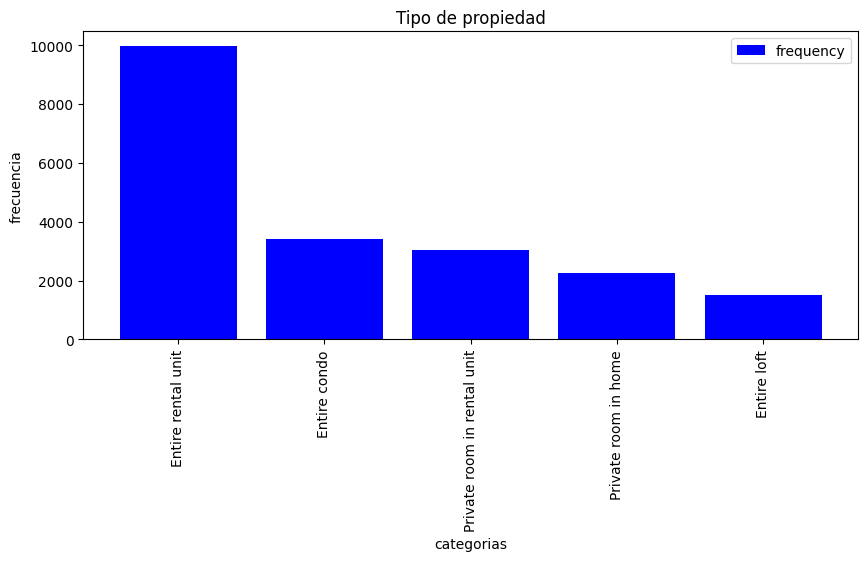

In [ ]:
filtro_property2.plot(kind='bar',width=0.8, figsize=(10,4),color="blue")
plt.title('Tipo de propiedad')
plt.xlabel('categorias')
plt.ylabel('frecuencia')

# room type

In [ ]:
table_room=freq_tbl(Mexico['room_type'])
table_room

,room_type,frequency,percentage,cumulative_perc
0,Entire home/apt,17363,0.653186,0.653186
1,Private room,8693,0.327026,0.980212
2,Shared room,401,0.015085,0.995298
3,Hotel room,125,0.004702,1.000000


In [ ]:
table_room2=table_room.drop(['percentage','cumulative_perc'],axis=1)
table_room2

,room_type,frequency
0,Entire home/apt,17363
1,Private room,8693
2,Shared room,401
3,Hotel room,125


In [ ]:
filtro_room=table_room2.set_index('room_type')
filtro_room

,frequency
room_type,
Entire home/apt,17363
Private room,8693
Shared room,401
Hotel room,125


Text(0, 0.5, 'frecuencia')

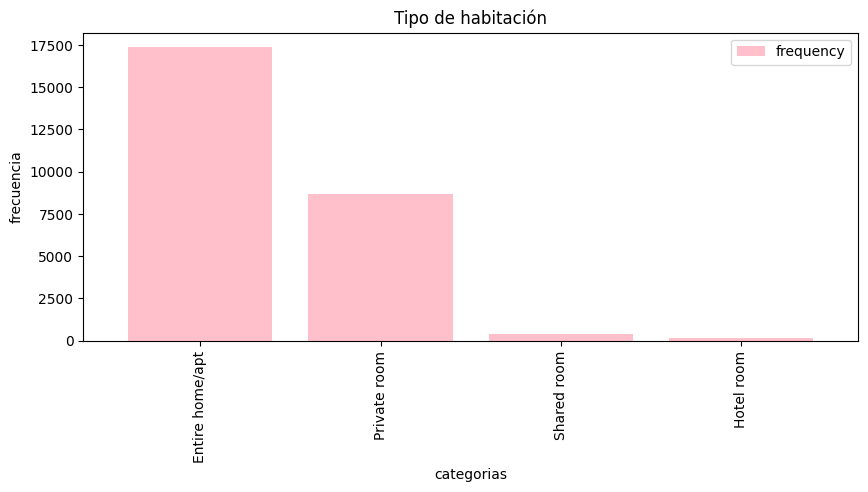

In [ ]:
filtro_room.plot(kind='bar',width=0.8, figsize=(10,4),color="pink")
plt.title('Tipo de habitación')
plt.xlabel('categorias')
plt.ylabel('frecuencia')

#amenities

In [ ]:
tabla_amenities=freq_tbl(Mexico['amenities'])
tabla_amenities

,amenities,frequency,percentage,cumulative_perc
0,"[""Iron"", ""Elevator"", ""High chair"", ""Wifi"", ""Re...",71,0.002671,0.002671
1,"[""Iron"", ""High chair"", ""Wifi"", ""Refrigerator"",...",41,0.001542,0.004213
2,[],40,0.001505,0.005718
3,"[""Iron"", ""Wifi"", ""Heating"", ""Self check-in"", ""...",29,0.001091,0.006809
4,"[""Iron"", ""Elevator"", ""High chair"", ""Wifi"", ""Re...",25,0.000940,0.007750
...,...,...,...,...
24693,"[""Host greets you"", ""Kitchen"", ""Refrigerator"",...",1,0.000038,0.999850
24694,"[""Iron"", ""Washer"", ""Private patio or balcony"",...",1,0.000038,0.999887
24695,"[""Iron"", ""Private patio or balcony"", ""Heating""...",1,0.000038,0.999925
24696,"[""Shared patio or balcony"", ""Wifi"", ""Freezer"",...",1,0.000038,0.999962


In [ ]:
tabla_amenities2=tabla_amenities.drop(['percentage','cumulative_perc'],axis=1)
tabla_amenities2

,amenities,frequency
0,"[""Iron"", ""Elevator"", ""High chair"", ""Wifi"", ""Re...",71
1,"[""Iron"", ""High chair"", ""Wifi"", ""Refrigerator"",...",41
2,[],40
3,"[""Iron"", ""Wifi"", ""Heating"", ""Self check-in"", ""...",29
4,"[""Iron"", ""Elevator"", ""High chair"", ""Wifi"", ""Re...",25
...,...,...
24693,"[""Host greets you"", ""Kitchen"", ""Refrigerator"",...",1
24694,"[""Iron"", ""Washer"", ""Private patio or balcony"",...",1
24695,"[""Iron"", ""Private patio or balcony"", ""Heating""...",1
24696,"[""Shared patio or balcony"", ""Wifi"", ""Freezer"",...",1


In [ ]:
filtro_amenities=tabla_amenities2[tabla_amenities2['frequency']>20]
filtro_amenities

,amenities,frequency
0,"[""Iron"", ""Elevator"", ""High chair"", ""Wifi"", ""Re...",71
1,"[""Iron"", ""High chair"", ""Wifi"", ""Refrigerator"",...",41
2,[],40
3,"[""Iron"", ""Wifi"", ""Heating"", ""Self check-in"", ""...",29
4,"[""Iron"", ""Elevator"", ""High chair"", ""Wifi"", ""Re...",25
5,"[""TV"", ""Wifi"", ""Kitchen""]",24
6,"[""Washer"", ""TV"", ""Wifi"", ""Kitchen"", ""Dedicated...",23


In [ ]:
filtro_amenities2=filtro_amenities.set_index('amenities')
filtro_amenities2

,frequency
amenities,
"[""Iron"", ""Elevator"", ""High chair"", ""Wifi"", ""Refrigerator"", ""Self check-in"", ""Hangers"", ""Backyard"", ""Crib"", ""Long term stays allowed"", ""Essentials"", ""Shampoo"", ""Hot water"", ""TV"", ""Patio or balcony"", ""Bed linens"", ""Kitchen"", ""Private entrance"", ""Air conditioning"", ""Microwave"", ""Cooking basics"", ""Lockbox"", ""Hair dryer""]",71
"[""Iron"", ""High chair"", ""Wifi"", ""Refrigerator"", ""Self check-in"", ""Hangers"", ""Backyard"", ""Crib"", ""Long term stays allowed"", ""Essentials"", ""Shampoo"", ""Hot water"", ""TV"", ""Bed linens"", ""Kitchen"", ""Private entrance"", ""Air conditioning"", ""Elevator"", ""Cooking basics"", ""Lockbox"", ""Hair dryer"", ""Microwave""]",41
[],40
"[""Iron"", ""Wifi"", ""Heating"", ""Self check-in"", ""Hangers"", ""Free parking on premises"", ""Carbon monoxide alarm"", ""Coffee maker"", ""First aid kit"", ""Essentials"", ""Shampoo"", ""Hot water"", ""Luggage dropoff allowed"", ""TV"", ""Bed linens"", ""Smoke alarm"", ""Extra pillows and blankets"", ""Fire extinguisher"", ""Air conditioning"", ""Gym"", ""Dedicated workspace"", ""Hair dryer"", ""Building staff""]",29
"[""Iron"", ""Elevator"", ""High chair"", ""Wifi"", ""Refrigerator"", ""Self check-in"", ""Pets allowed"", ""Hangers"", ""Free parking on premises"", ""Dryer \u2013\u00a0In unit"", ""Crib"", ""Long term stays allowed"", ""Essentials"", ""Shampoo"", ""Hot water"", ""TV"", ""Bed linens"", ""Kitchen"", ""Private entrance"", ""Oven"", ""Washer \u2013\u00a0In unit"", ""Microwave"", ""Cooking basics"", ""Lockbox"", ""Hair dryer""]",25
"[""TV"", ""Wifi"", ""Kitchen""]",24
"[""Washer"", ""TV"", ""Wifi"", ""Kitchen"", ""Dedicated workspace""]",23


<Axes: ylabel='frequency'>

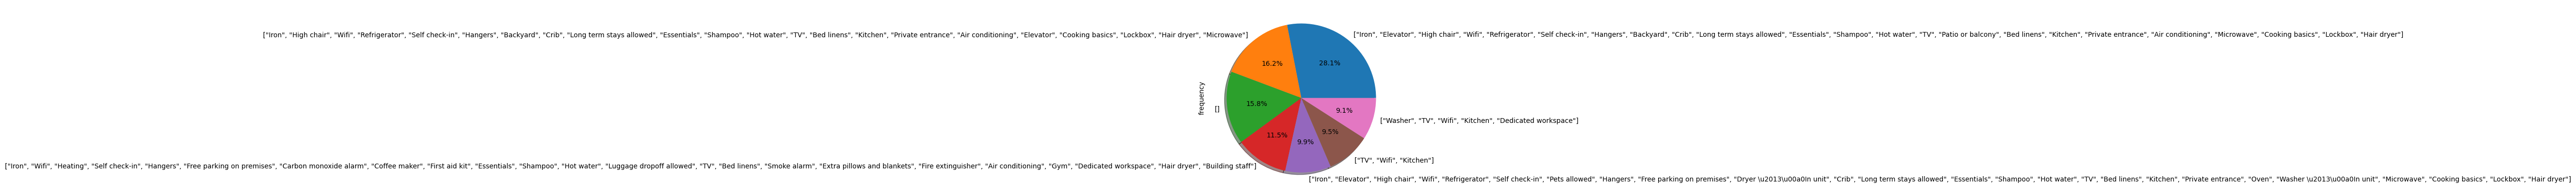

In [ ]:
filtro_amenities2["frequency"].plot(kind='pie',figsize=(10,5),shadow=True,autopct='%1.1f%%')

#price

In [ ]:
table_price=freq_tbl(Mexico['price'])
table_price

'No categorical variables to analyze.'

#has_availability

In [ ]:
table_availability=freq_tbl(Mexico['has_availability'])
table_availability

,has_availability,frequency,percentage,cumulative_perc
0,t,25533,0.960537,0.960537
1,f,1049,0.039463,1.000000


In [ ]:
table_availability2=table_availability.drop(['percentage','cumulative_perc'],axis=1)
table_availability2

,has_availability,frequency
0,t,25533
1,f,1049


In [ ]:
filtro_availability=table_availability2.set_index('has_availability')
filtro_availability

,frequency
has_availability,
t,25533
f,1049


Text(0, 0.5, 'frecuencia')

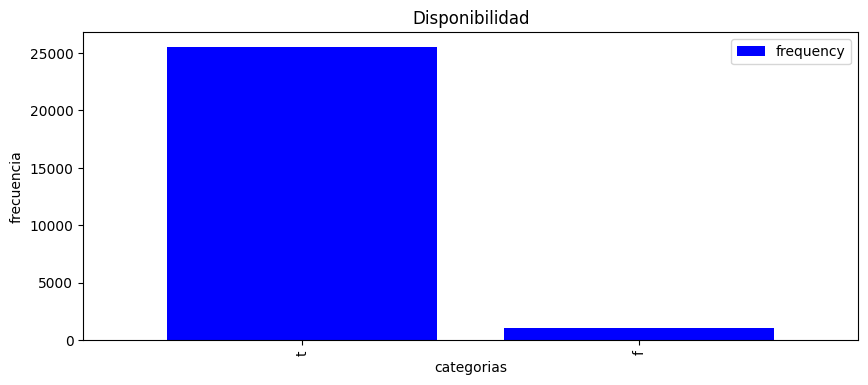

In [ ]:
filtro_availability.plot(kind='bar',width=0.8, figsize=(10,4),color="blue")
plt.title('Disponibilidad')
plt.xlabel('categorias')
plt.ylabel('frecuencia')

#first_review

In [ ]:
table_review=freq_tbl(Mexico['has_availability'])
table_review

,has_availability,frequency,percentage,cumulative_perc
0,t,25533,0.960537,0.960537
1,f,1049,0.039463,1.000000


In [ ]:
table_review2=table_review.drop(['percentage','cumulative_perc'],axis=1)
table_review2

,has_availability,frequency
0,t,25533
1,f,1049


In [ ]:
filtro_review=table_review2.set_index('has_availability')
filtro_review

,frequency
has_availability,
t,25533
f,1049


Text(0, 0.5, 'frecuencia')

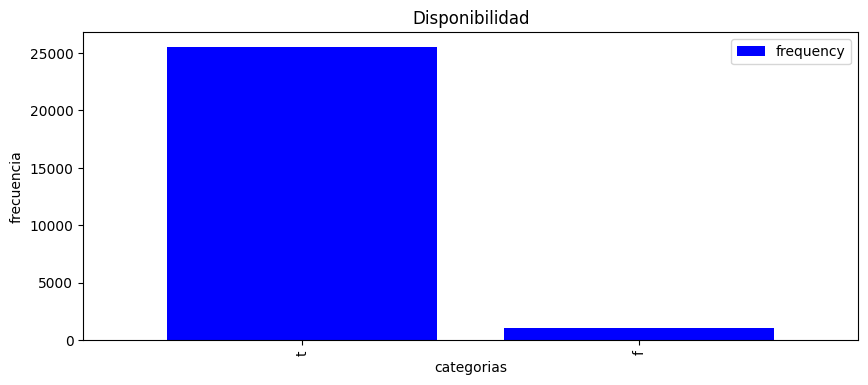

In [ ]:
filtro_review.plot(kind='bar',width=0.8, figsize=(10,4),color="blue")
plt.title('Disponibilidad')
plt.xlabel('categorias')
plt.ylabel('frecuencia')

#last_review

In [ ]:
table_last_review=freq_tbl(Mexico['last_review'])
table_last_review

,last_review,frequency,percentage,cumulative_perc
0,1900-01-01 00:00:00,3656,0.137537,0.137537
1,22/09/2024,1081,0.040667,0.178203
2,16/09/2024,1068,0.040178,0.218381
3,23/09/2024,898,0.033782,0.252163
4,17/09/2024,711,0.026747,0.278911
...,...,...,...,...
1630,24/04/2019,1,0.000038,0.999850
1631,09/08/2021,1,0.000038,0.999887
1632,02/10/2019,1,0.000038,0.999925
1633,15/07/2018,1,0.000038,0.999962


In [ ]:
table_last_review2=table_last_review.drop(['percentage','cumulative_perc'],axis=1)
table_last_review2

,last_review,frequency
0,1900-01-01 00:00:00,3656
1,22/09/2024,1081
2,16/09/2024,1068
3,23/09/2024,898
4,17/09/2024,711
...,...,...
1630,24/04/2019,1
1631,09/08/2021,1
1632,02/10/2019,1
1633,15/07/2018,1


In [ ]:
filtro_last_review=table_last_review2[table_last_review2['frequency']>400]
filtro_last_review

,last_review,frequency
0,1900-01-01 00:00:00,3656
1,22/09/2024,1081
2,16/09/2024,1068
3,23/09/2024,898
4,17/09/2024,711
5,08/09/2024,680
6,01/09/2024,537
7,21/09/2024,513
8,09/09/2024,422


In [ ]:
filtro_last_review2=filtro_last_review.set_index('last_review')
filtro_last_review2

,frequency
last_review,
1900-01-01 00:00:00,3656
22/09/2024,1081
16/09/2024,1068
23/09/2024,898
17/09/2024,711
08/09/2024,680
01/09/2024,537
21/09/2024,513
09/09/2024,422


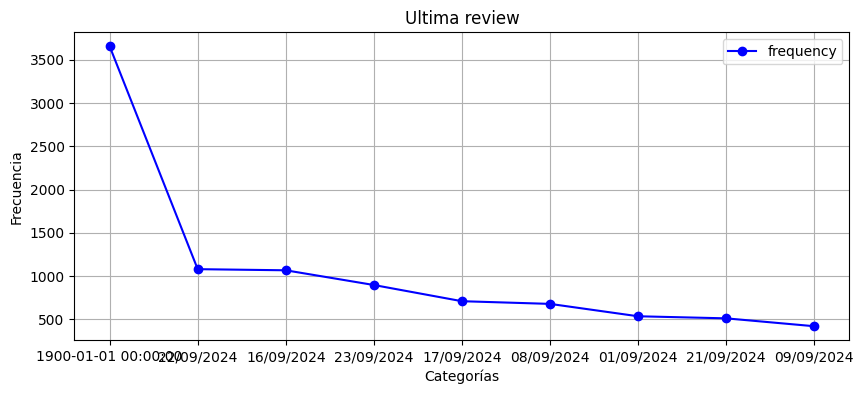

In [ ]:
filtro_last_review2.plot(kind='line', marker='o', figsize=(10, 4), color="blue")

plt.title('Ultima review')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.grid(True)

#instant_bookable

In [ ]:
  table_instant_bookable=freq_tbl(Mexico['instant_bookable'])
  table_instant_bookable

,instant_bookable,frequency,percentage,cumulative_perc
0,f,16080,0.604921,0.604921
1,t,10502,0.395079,1.000000


In [ ]:
  table_instant_bookable2=table_instant_bookable.drop(['percentage','cumulative_perc'],axis=1)
  table_instant_bookable2

,instant_bookable,frequency
0,f,16080
1,t,10502


In [ ]:
  filtro_instant_bookable=table_instant_bookable2.set_index('instant_bookable')
  filtro_instant_bookable

,frequency
instant_bookable,
f,16080
t,10502


Text(0, 0.5, 'frecuencia')

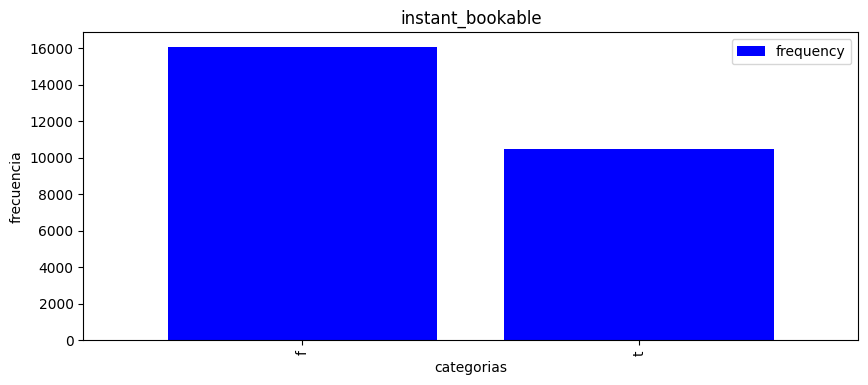

In [ ]:
  filtro_instant_bookable.plot(kind='bar',width=0.8, figsize=(10,4),color="blue")
  plt.title('instant_bookable')
  plt.xlabel('categorias')
  plt.ylabel('frecuencia')


# **PARTE 2**

# accommodates

In [ ]:
Mexico['accommodates'].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [ ]:
  max_accommodates=Mexico['accommodates'].max()
  min_accommodates=Mexico['accommodates'].min()
  limites_accommodates=[min_accommodates,max_accommodates]
  limites_accommodates

[1.0, 7.0]

In [ ]:
r_accommodates=max_accommodates-min_accommodates
r_accommodates

6.0

In [ ]:
ni_accommodates=1+3.32*np.log10(n)
ni_accommodates

15.689631010177528

In [ ]:
i_accommodates=r_accommodates/ni_accommodates
i_accommodates

0.38241817134564404

In [ ]:
intervalos_accommodates=np.linspace(min_accommodates,max_accommodates,16)
intervalos_accommodates

array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. , 5.4, 5.8,
       6.2, 6.6, 7. ])

In [ ]:
categorias_accommodates=["categoria1","categoria2", "categoria3", "categoria4", "categoria5",
            "categoria6", "categoria7", "categoria8", "categoria9", "categoria10","categoria11", "categoria12","categoria13","categoria14","categoria15"]

In [ ]:
Mexico['accommodates']=pd.cut(Mexico['accommodates'],bins=intervalos_accommodates,labels=categorias_accommodates)
Mexico['accommodates']

,accommodates
0,categoria3
1,categoria5
2,categoria8
3,categoria3
4,categoria3
...,...
26577,categoria8
26578,categoria3
26579,categoria3
26580,categoria3


# host_response_rate

In [ ]:
Mexico['host_response_rate'].info()
n=26582

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: host_response_rate
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [ ]:
max_host_response_rate=Mexico['host_response_rate'].max()
min_host_response_rate=Mexico['host_response_rate'].min()
limites_host_response_rate=[min_host_response_rate,max_host_response_rate]
limites_host_response_rate

[0.0, 1.0]

In [ ]:
max_host_response_rate = float(str(max_host_response_rate).strip('%')) / 100
min_host_response_rate = float(str(min_host_response_rate).strip('%')) / 100

# Calcular la diferencia
r_host_response_rate = max_host_response_rate - min_host_response_rate
r_host_response_rate

0.01

In [ ]:
ni_host_response_rate=1+3.32*np.log10(n)
ni_host_response_rate

15.689631010177528

In [ ]:
i_host_response_rate=r_host_response_rate/ni_host_response_rate
i_host_response_rate

0.0006373636189094067

In [ ]:
intervalos_host_response_rate=np.linspace(min_host_response_rate,max_host_response_rate,16)
intervalos_host_response_rate

array([0.        , 0.00066667, 0.00133333, 0.002     , 0.00266667,
       0.00333333, 0.004     , 0.00466667, 0.00533333, 0.006     ,
       0.00666667, 0.00733333, 0.008     , 0.00866667, 0.00933333,
       0.01      ])

In [ ]:
categorias_host_response_rate=["categoria1","categoria2", "categoria3", "categoria4", "categoria5",
            "categoria6", "categoria7", "categoria8", "categoria9", "categoria10","categoria11", "categoria12","categoria13","categoria14","categoria15"]


In [ ]:
Mexico['host_response_rate'] = Mexico['host_response_rate'].astype(str).str.strip('%')

# Reemplazar valores no numéricos con NaN y convertir a float
Mexico['host_response_rate'] = pd.to_numeric(Mexico['host_response_rate'], errors='coerce')

# Aplicar pd.cut() solo a los valores no nulos
Mexico['host_response_rate_category'] = pd.cut(Mexico['host_response_rate'][Mexico['host_response_rate'].notnull()],
                                           bins=intervalos_host_response_rate,
                                           labels=categorias_host_response_rate)

Mexico['host_response_rate_category']


,host_response_rate_category
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
26577,NaN
26578,NaN
26579,NaN
26580,NaN


# host_total_listings_count

In [ ]:
Mexico['host_total_listings_count'].info()
n=171

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: host_total_listings_count
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [ ]:
Max_listings_count=Mexico['host_total_listings_count'].max()
Min_listings_count=Mexico['host_total_listings_count'].min()
listings_count=[Min_listings_count, Max_listings_count]
listings_count

[1.0, 39.0]

In [ ]:
R_listings_count=Max_listings_count-Min_listings_count
R_listings_count

38.0

In [ ]:
#calculamos el numero de intervalos de clases ni aplicamos regla de strugers
ni_listings_count=1+3.32*np.log10(n)
ni_listings_count

8.41354708650195

In [ ]:
intervalos_listings_count=np.linspace(Min_listings_count, Max_listings_count, 9)
intervalos_listings_count

array([ 1.  ,  5.75, 10.5 , 15.25, 20.  , 24.75, 29.5 , 34.25, 39.  ])

In [ ]:
categorias_listings_count=["Categoria1", "Categoria2","Categoria3","Categoria4","Categoria5", "Categoria6", "Categoria7", "Categoria8"]

In [ ]:
Mexico['host_total_listings_count'] = Mexico['host_total_listings_count'].astype(str).str.strip('%')

# Reemplazar valores no numéricos con NaN y convertir a float
Mexico['host_total_listings_count'] = pd.to_numeric(Mexico['host_total_listings_count'], errors='coerce')

# Aplicar pd.cut() solo a los valores no nulos
Mexico['host_total_listings_count'] = pd.cut(Mexico['host_total_listings_count'][Mexico['host_total_listings_count'].notnull()],
                                           bins=intervalos_listings_count,
                                           labels=categorias_listings_count)

Mexico['host_total_listings_count']

,host_total_listings_count
0,NaN
1,Categoria3
2,Categoria1
3,Categoria1
4,Categoria2
...,...
26577,Categoria2
26578,Categoria4
26579,Categoria4
26580,Categoria4


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


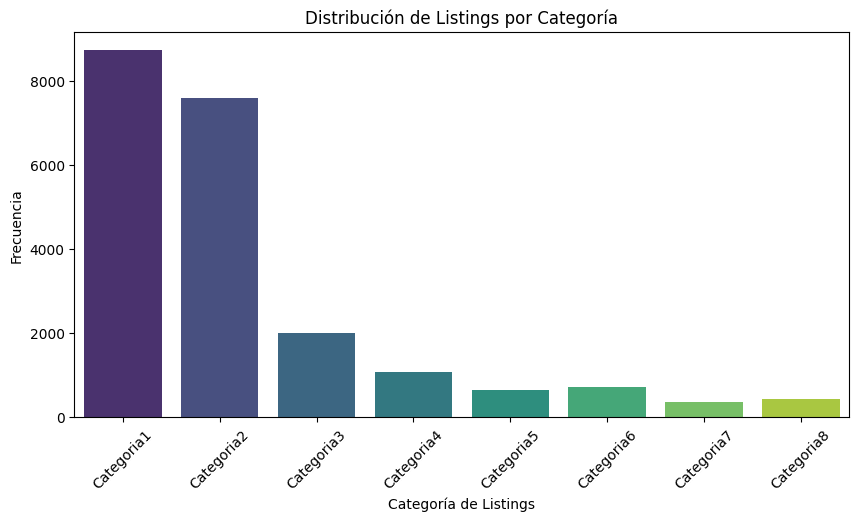

In [ ]:
conteo_categorias = Mexico['host_total_listings_count'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_categorias.index, y=conteo_categorias.values, palette="viridis")

# Personalizar el gráfico
plt.xlabel('Categoría de Listings')
plt.ylabel('Frecuencia')
plt.title('Distribución de Listings por Categoría')
plt.xticks(rotation=45)  # Girar etiquetas para mejor visibilidad
plt.show()

# accommodates

In [ ]:
Mexico['accommodates'].info()
n=171

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: accommodates
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [ ]:
Max_accommodates=Mexico['accommodates'].max()
Min_accommodates=Mexico['accommodates'].min()
accommodates=[Min_accommodates, Max_accommodates]
accommodates

[1.0, 7.0]

In [ ]:
R_accommodates=Max_accommodates-Min_accommodates
R_accommodates

6.0

In [ ]:
ni_accommodates=1+3.32*np.log10(n)
ni_accommodates

8.41354708650195

In [ ]:
intervalos_accommodates=np.linspace(Min_accommodates, Max_accommodates, 9)
intervalos_accommodates

array([1.  , 1.75, 2.5 , 3.25, 4.  , 4.75, 5.5 , 6.25, 7.  ])

In [ ]:
categorias_accommodates=["Categoria1", "Categoria2","Categoria3","Categoria4","Categoria5", "Categoria6", "Categoria7", "Categoria8"]

In [ ]:
Mexico['accommodates']=pd.cut(Mexico['accommodates'],bins=intervalos_accommodates,labels=categorias_accommodates)
Mexico['accommodates']

,accommodates
0,Categoria2
1,Categoria3
2,Categoria4
3,Categoria2
4,Categoria2
...,...
26577,Categoria4
26578,Categoria2
26579,Categoria2
26580,Categoria2


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


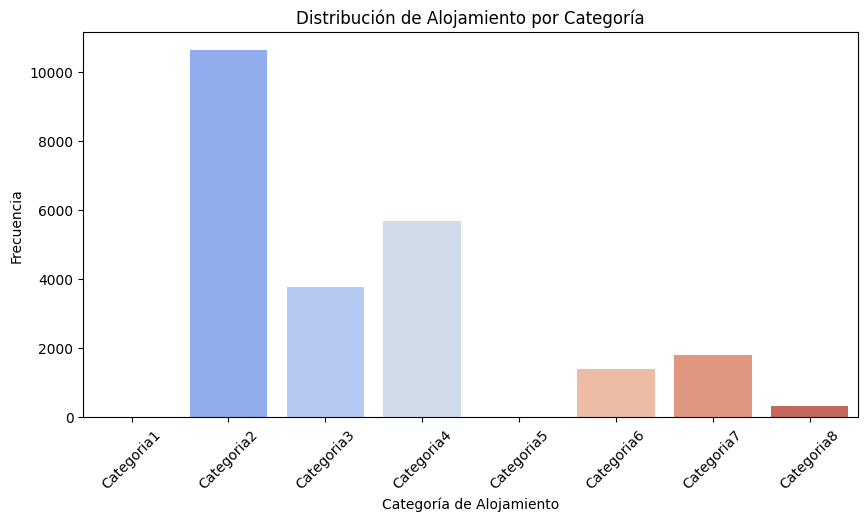

In [ ]:
conteo_accommodates = Mexico['accommodates'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_accommodates.index, y=conteo_accommodates.values, palette="coolwarm")

# Personalizar el gráfico
plt.xlabel('Categoría de Alojamiento')
plt.ylabel('Frecuencia')
plt.title('Distribución de Alojamiento por Categoría')
plt.xticks(rotation=45)  # Rotar etiquetas para mejor legibilidad
plt.show()

# beds

In [ ]:
Mexico['beds'].info()
n=171

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [ ]:
Max_beds=Mexico['beds'].max()
Min_beds=Mexico['beds'].min()
beds=[Min_beds, Max_beds]
beds

[0.0, 3.0]

In [ ]:
R_beds=Max_beds-Min_beds
R_beds

3.0

In [ ]:
ni_beds=1+3.32*np.log10(n)
ni_beds

8.41354708650195

In [ ]:
intervalos_beds=np.linspace(Min_beds, Max_beds, 9)
intervalos_beds

array([0.   , 0.375, 0.75 , 1.125, 1.5  , 1.875, 2.25 , 2.625, 3.   ])

In [ ]:
categorias_beds=["Categoria1", "Categoria2","Categoria3","Categoria4","Categoria5", "Categoria6", "Categoria7", "Categoria8"]

In [ ]:
Mexico['beds']=pd.cut(Mexico['beds'],bins=intervalos_beds,labels=categorias_beds)
Mexico['beds']

,beds
0,Categoria3
1,Categoria3
2,Categoria6
3,Categoria3
4,Categoria3
...,...
26577,Categoria6
26578,Categoria3
26579,Categoria3
26580,Categoria3


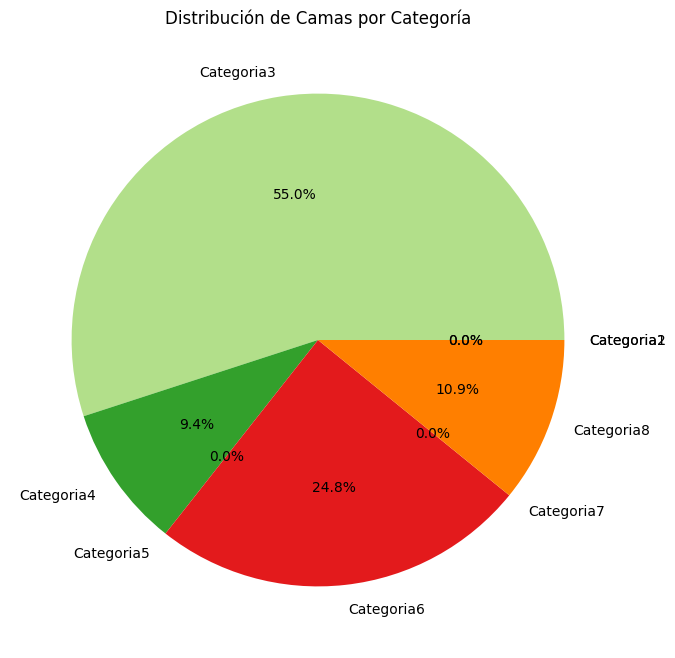

In [ ]:
conteo_beds = Mexico['beds'].value_counts().sort_index()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_beds, labels=conteo_beds.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Personalizar el gráfico
plt.title('Distribución de Camas por Categoría')
plt.show()

# maximum_nights_avg_ntm

In [ ]:
Mexico['maximum_nights_avg_ntm'].info()
n=171

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: maximum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [ ]:
Max_maximum_nights_avg_ntm=Mexico['maximum_nights_avg_ntm'].max()
Min_maximum_nights_avg_ntm=Mexico['maximum_nights_avg_ntm'].min()
location_maximum_nights_avg_ntm=[Min_maximum_nights_avg_ntm, Max_maximum_nights_avg_ntm]
location_maximum_nights_avg_ntm

[1.0, 1825.0]

In [ ]:
R_maximum_nights_avg_ntm=Max_maximum_nights_avg_ntm-Min_maximum_nights_avg_ntm
R_maximum_nights_avg_ntm

1824.0

In [ ]:
ni_maximum_nights_avg_ntm=1+3.32*np.log10(n)
ni_maximum_nights_avg_ntm

8.41354708650195

In [ ]:
intervalos_maximum_nights_avg_ntm=np.linspace(Min_maximum_nights_avg_ntm, Max_maximum_nights_avg_ntm, 9)
intervalos_maximum_nights_avg_ntm

array([1.000e+00, 2.290e+02, 4.570e+02, 6.850e+02, 9.130e+02, 1.141e+03,
       1.369e+03, 1.597e+03, 1.825e+03])

In [ ]:
categorias_maximum_nights_avg_ntm=["Categoria1", "Categoria2","Categoria3","Categoria4","Categoria5", "Categoria6", "Categoria7", "Categoria8"]

In [ ]:
Mexico['maximum_nights_avg_ntm']=pd.cut(Mexico['maximum_nights_avg_ntm'],bins=intervalos_maximum_nights_avg_ntm,labels=categorias_maximum_nights_avg_ntm)
Mexico['maximum_nights_avg_ntm']

,maximum_nights_avg_ntm
0,Categoria1
1,Categoria2
2,Categoria1
3,Categoria1
4,Categoria5
...,...
26577,Categoria1
26578,Categoria2
26579,Categoria2
26580,Categoria2


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


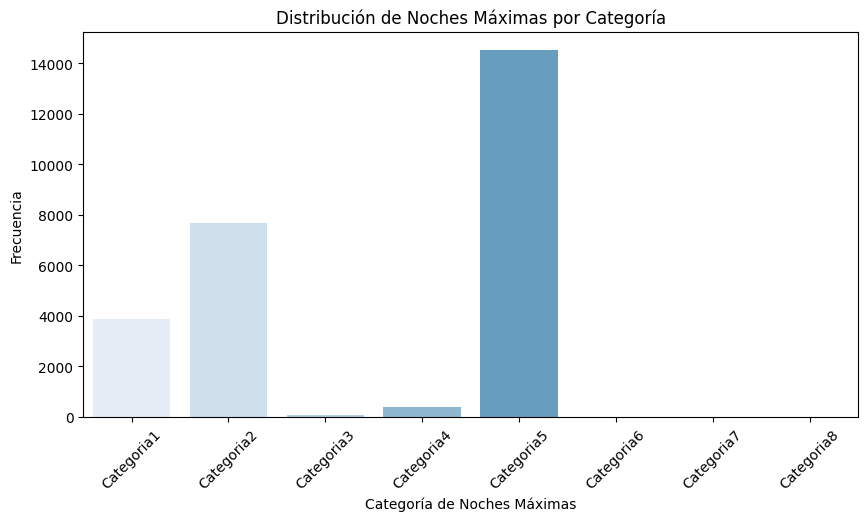

In [ ]:
conteo_max_nights = Mexico['maximum_nights_avg_ntm'].value_counts().sort_index()

# Crear el histograma (gráfico de barras)
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_max_nights.index, y=conteo_max_nights.values, palette="Blues")

# Personalizar el gráfico
plt.xlabel('Categoría de Noches Máximas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Noches Máximas por Categoría')
plt.xticks(rotation=45)  # Girar etiquetas para mejor visibilidad
plt.show()

# review_scores_location


In [ ]:
Mexico['review_scores_location'].info()
n=171

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_location
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [ ]:
Max_review_scores_location=Mexico['review_scores_location'].max()
Min_review_scores_location=Mexico['review_scores_location'].min()
review_scores_location=[Min_review_scores_location, Max_review_scores_location]
review_scores_location

[4.58, 5.0]

In [ ]:
R_review_scores_location=Max_review_scores_location-Min_review_scores_location
R_review_scores_location

0.41999999999999993

In [ ]:
ni_review_scores_location=1+3.32*np.log10(n)
ni_review_scores_location

8.41354708650195

In [ ]:
intervalos_review_scores_location=np.linspace(Min_review_scores_location, Max_review_scores_location, 9)
intervalos_review_scores_location

array([4.58  , 4.6325, 4.685 , 4.7375, 4.79  , 4.8425, 4.895 , 4.9475,
       5.    ])

In [ ]:
categorias_review_scores_location=["Categoria1", "Categoria2","Categoria3","Categoria4","Categoria5", "Categoria6", "Categoria7", "Categoria8"]

In [ ]:
Mexico['review_scores_location']=pd.cut(Mexico['review_scores_location'],bins=intervalos_review_scores_location,labels=categorias_review_scores_location)
Mexico['review_scores_location']

,review_scores_location
0,Categoria7
1,Categoria8
2,Categoria8
3,Categoria8
4,Categoria7
...,...
26577,Categoria7
26578,Categoria7
26579,Categoria7
26580,Categoria7


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


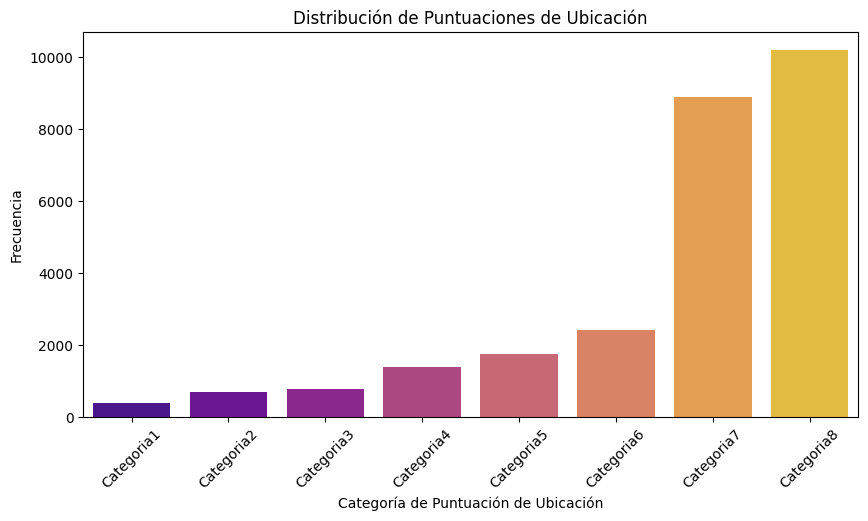

In [ ]:
conteo_scores = Mexico['review_scores_location'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_scores.index, y=conteo_scores.values, palette="plasma")

# Personalizar el gráfico
plt.xlabel('Categoría de Puntuación de Ubicación')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntuaciones de Ubicación')
plt.xticks(rotation=45)  # Girar etiquetas para mejor visibilidad
plt.show()

# review_scores_value

In [ ]:
Mexico['review_scores_value'].info()
n=171

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: review_scores_value
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [ ]:
Max_review_scores_value=Mexico['review_scores_value'].max()
Min_review_scores_value=Mexico['review_scores_value'].min()
review_scores_value=[Min_review_scores_value, Max_review_scores_value]
review_scores_value

[4.38, 5.0]

In [ ]:
R_review_scores_value=Max_review_scores_value-Min_review_scores_value
R_review_scores_value

0.6200000000000001

In [ ]:
ni_review_scores_value=1+3.32*np.log10(n)
ni_review_scores_value

8.41354708650195

In [ ]:
intervalos_review_scores_value=np.linspace(Min_review_scores_value, Max_review_scores_value, 9)
intervalos_review_scores_value

array([4.38  , 4.4575, 4.535 , 4.6125, 4.69  , 4.7675, 4.845 , 4.9225,
       5.    ])

In [ ]:
categorias_review_scores_value=["Categoria1", "Categoria2","Categoria3","Categoria4","Categoria5", "Categoria6", "Categoria7", "Categoria8"]

In [ ]:
Mexico['review_scores_value']=pd.cut(Mexico['review_scores_value'],bins=intervalos_review_scores_value,labels=categorias_review_scores_value)
Mexico['review_scores_value']

,review_scores_value
0,Categoria5
1,Categoria2
2,Categoria7
3,Categoria7
4,Categoria6
...,...
26577,Categoria5
26578,Categoria5
26579,Categoria5
26580,Categoria5


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


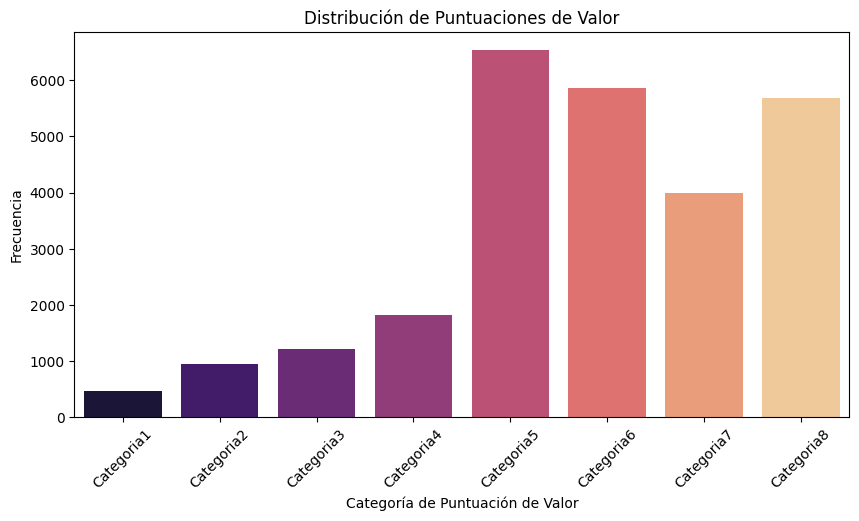

In [ ]:
conteo_scores_value = Mexico['review_scores_value'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_scores_value.index, y=conteo_scores_value.values, palette="magma")

# Personalizar el gráfico
plt.xlabel('Categoría de Puntuación de Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de Puntuaciones de Valor')
plt.xticks(rotation=45)  # Girar etiquetas para mejor visibilidad
plt.show()

# reviews_per_month

In [ ]:
Mexico['reviews_per_month'].info()
n=171

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [ ]:
Max_reviews_per_month=Mexico['reviews_per_month'].max()
Min_reviews_per_month=Mexico['reviews_per_month'].min()
reviews_per_month=[Min_reviews_per_month, Max_reviews_per_month]
reviews_per_month

[0.01, 4.72]

In [ ]:
R_reviews_per_month=Max_reviews_per_month-Min_reviews_per_month
R_reviews_per_month

4.71

In [ ]:
ni_reviews_per_month=1+3.32*np.log10(n)
ni_reviews_per_month

8.41354708650195

In [ ]:
intervalos_reviews_per_month=np.linspace(Min_reviews_per_month, Max_reviews_per_month, 9)
intervalos_reviews_per_month

array([0.01   , 0.59875, 1.1875 , 1.77625, 2.365  , 2.95375, 3.5425 ,
       4.13125, 4.72   ])

In [ ]:
categorias_reviews_per_month=["Categoria1", "Categoria2","Categoria3","Categoria4","Categoria5", "Categoria6", "Categoria7", "Categoria8"]

In [ ]:
Mexico['reviews_per_month']=pd.cut(Mexico['reviews_per_month'],bins=intervalos_reviews_per_month,labels=categorias_reviews_per_month)
Mexico['reviews_per_month']

,reviews_per_month
0,Categoria3
1,Categoria1
2,Categoria1
3,Categoria2
4,Categoria1
...,...
26577,Categoria3
26578,Categoria3
26579,Categoria3
26580,Categoria3


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


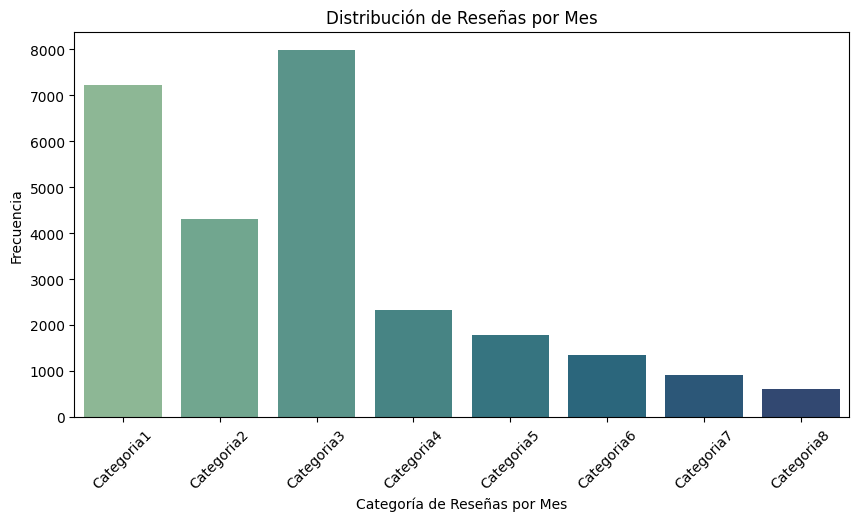

In [ ]:
conteo_reviews_per_month = Mexico['reviews_per_month'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=conteo_reviews_per_month.index, y=conteo_reviews_per_month.values, palette="crest")

# Personalizar el gráfico
plt.xlabel('Categoría de Reseñas por Mes')
plt.ylabel('Frecuencia')
plt.title('Distribución de Reseñas por Mes')
plt.xticks(rotation=45)  # Girar etiquetas para mejor visibilidad
plt.show()